## Cooling of the Oceanic Lithosphere

The conductive cooling of oceanic lithosphere when it spreads away from the mid-oceanic ridge
can be described by the diffusion equation:

\begin{align}
    \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial z^2} \tag{9},
\end{align}

where $\kappa$ represents the thermal diffusivity is related to the conductivity ($k$), density ($\rho$), and specific heat capacity ($Cp$) of the rock as $\frac{k}{\rho Cp}$.

In the above equation, the heat generation due to radioactive decay is ignored. This is a valid assumption for the basaltic rocks which contain low concentrations of heat-producing elements (Thorium, Uranium, Potassium etc). The variations in temperature along y-direction and x-direction are also ignored as the lateral hat conduction is much smaller away from the ridge axis compared to the vertical heat conduction.

The computed tempeartures for this problem that satisfies the boundary conditions $T=T_s$ at the surface, $z=0$, $T=T_m$ at depths $z \rightarrow \infty$ can be given by:

\begin{align}
    \frac{T_m - T}{T_m - T_s} = \text{erfc} \left( \frac{z}{2\sqrt{\kappa t}} \right) \tag{10},
\end{align}

Here, $T_s$ and $T_m$ is the surface and the ambient-mantle temperature, respectively, time $t=x/u$, where plates move with velocity $u$ and $x$ is the distance from the ridge axis, and ercf is the complementary error function (see https://mathworld.wolfram.com/Erfc.html for details).  

The solution can be illustrated in the figure below.
<figure>
    <img src="./images/cooling-oceanic-lithosphere.png" style="width:40%">
    <figcaption align = "center"> The cooling of oceanic lithosphere (Turcotte and Schubert)</figcaption>
</figure>

### Evaluate the temperature field numerically

In [ ]:
# Load the relevant libaries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from matplotlib import cm

In [ ]:
# Let's define the typical values for the oceanic lithosphere
# We use SI units to define all our variables and constants

surface_temperature  = 273  # [K]
mantle_temperature   = 1573 # [K]
thermal_diffusivity  = 1e-6 # m^2/s
thermal_conductivity = 3.3  # W/m K

year_to_seconds      = 365 * 24 * 3600

In [ ]:
# This is where we define the extent of the dependent variables in the solution,
# i.e., how the computed temperatures changes with depth as the oceanic
# plate forms and cools down with time

depth = np.arange(0, 150e3, 1e3)
time  = np.arange(1, 200e6, 1e6)

time_grd, depth_grd = np.meshgrid(time, depth)

In [ ]:
# Here, we compute the temperatures for the desired time and depth values.
# Note that the time needs to be in the SI units so we convert the years into seconds.

T = mantle_temperature - (mantle_temperature - surface_temperature) * \
    erfc(depth_grd/(2 * np.sqrt(thermal_diffusivity * time_grd * year_to_seconds ) ) )

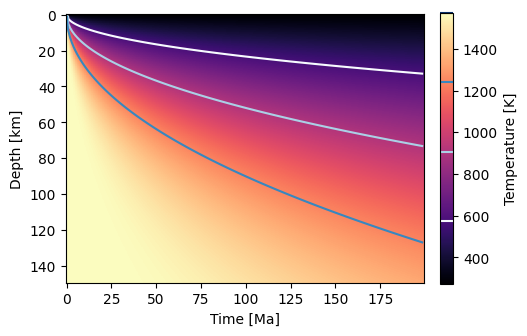

In [ ]:
#------------------------------------------------------------------------------
# Plot the temperatures
#------------------------------------------------------------------------------

# Besides the computed temperature, we also plot isotherms corresponding to different
# temperature values. We can think of lithosphere as the region between the surface and
# a particular isotherm. Typically, we use isotherm corresponding to 1300 C or 1573 K
# to define the base of the lithosphere

lithosphere_isotherm  = 1573
isotherm_values       = np.linspace(surface_temperature + 300, lithosphere_isotherm, 4)

fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))

img = ax1.imshow(T, cmap='magma')
ctr = ax1.contour(T, list(isotherm_values), cmap=cm.Blues)

ax1.set_xlabel("Time [Ma]")
ax1.set_ylabel("Depth [km]")

cbar = plt.colorbar(img, ax=ax1, fraction=0.035, pad=0.04, orientation='vertical')
cbar.set_label('Temperature [K]')
cbar.add_lines(ctr)

### Surface Heat Flow

The computed temperatures look similar to our schematic, but they are hard to compare with the observational data as we lack direct observations for temperatures at depths. Instead, we have observations for surface heat flow with which we can compare our solution.

To do this, we utilize the Fourier's law of conduction, which relates the surface heat flow to the temperature gradient as $\mathbf{q} = -k \nabla T $, where the constant of proportionality is the conductivity of the medium.

The surface heat flow can be given as $q = -k \left(\frac{\partial T}{\partial y} \right)_{y=0}$.
Taking the temperature solution from above, we can compute the surface heat flow as:

\begin{align}
    q = k \frac{(Tm - Ts)}{\sqrt{\pi \kappa t}}
\end{align}

Text(0, 0.5, 'Heat flow, q [mW/m$^{-2}$]')

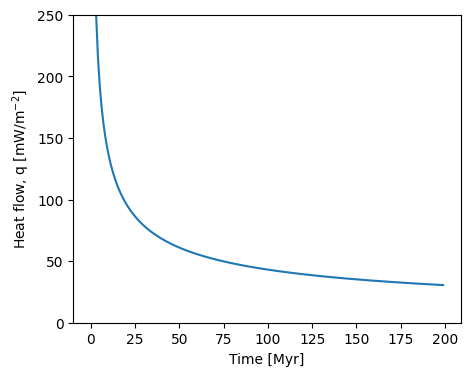

In [ ]:
# Let's compute the surface heat flow using the above equation

heat_flow = thermal_conductivity * (mantle_temperature - surface_temperature) / \
            (np.sqrt (np.pi * thermal_diffusivity * time * year_to_seconds))

fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
ax1.plot(time/(1e6), heat_flow*1e3) # heat flux in mW/m^2
ax1.set_ylim([0, 250])
ax1.set_xlabel('Time [Myr]')
ax1.set_ylabel('Heat flow, q [mW/m$^{-2}$]')

### Plot observed heat flow data

Now let's plot some heat flow observations at oceanic plates from Lister et. al, (1990): *Heat flow maintained in ocean basins of great age: investigations in the north-equatorial West Pacific*

In [1]:
# This file contains the digitized Fig. 16(a) from the above study
data_observed = np.loadtxt('files/Lister_heat_flow_from_plot.txt', delimiter=",")

NameError: name 'np' is not defined

In [4]:
heat_flow_observed = data_observed[:, 1]
plate_age_observed = data_observed[:, 0]

fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
ax1.set_ylim([0, 250])
ax1.plot(time/(1e6), heat_flow*1e3) # heat flux in mW/m^2
ax1.plot(plate_age_observed, heat_flow_observed, 'o')
ax1.set_xlabel('Time [Myr]')
ax1.set_ylabel('Heat flow, q [mW/m$^{-2}$]')

NameError: name 'data_observed' is not defined

From the above plot, we see that a good agreement is found at younger plate ages
but the data appear to lie above the theoretical prediction for older ages.  To address this discrepancy, we discuss the **plate cooling model of the lithosphere**.

&nbsp; <div style="text-align: right">   
    &rarr; <b>NEXT: [Plate cooling model](./9_plate_cooling_model_of_lithosphere.ipynb)</b> <a href=""></a> &nbsp;&nbsp;
<img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
    </div>